In [41]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import csv

In [42]:
cur_path = '/Users/sonalichaudhari/Desktop/ADS_Project/Data'
df = pd.read_csv(open(cur_path+'/dataformodels.csv','rU'), encoding='utf-8')

In [3]:
df.dtypes

Year                 int64
Day                  int64
Month                int64
Week                 int64
Origin              object
Dest                object
UniqueCarrier       object
CRSElapsedTime       int64
WheelsOn             int64
WheelsOff            int64
Distance             int64
OriginWind         float64
OriginPrecip       float64
CRSDep_hour          int64
CRSArr_hour          int64
Flight_Status        int64
DepDelayMinutes      int64
CRSArrTime           int64
CRSDepTime           int64
dtype: object

In [4]:
df.shape

(8058349, 19)

In [5]:
df['CRSDep_hour'] = df['CRSDepTime'].apply(lambda x: str(x)[:-2])
df['CRSDep_min'] = df['CRSDepTime'].apply(lambda x: str(x)[1:3] if len(str(x))==3 else  str(x)[2:4])
df = df.replace('', 0)
df['CRSArr_hour'] = df['CRSArrTime'].apply(lambda x: str(x)[:-2])
df['CRSArr_min'] = df['CRSArrTime'].apply(lambda x: str(x)[1:3] if len(str(x))==3 else  str(x)[2:4])
df = df.replace('', 0)

In [6]:
df['Scheduled_Dep_T'] = df.CRSDep_hour.astype(str).str.cat(df.CRSDep_min.astype(str), sep=':')
df['Scheduled_Arr_T'] = df.CRSArr_hour.astype(str).str.cat(df.CRSArr_min.astype(str), sep=':')

In [7]:
df[['CRSDep_hour','CRSDep_min','CRSArr_hour','CRSArr_min']] = df[['CRSDep_hour','CRSDep_min','CRSArr_hour','CRSArr_min']].astype(int)

In [8]:
df.dtypes

Year                 int64
Day                  int64
Month                int64
Week                 int64
Origin              object
Dest                object
UniqueCarrier       object
CRSElapsedTime       int64
WheelsOn             int64
WheelsOff            int64
Distance             int64
OriginWind         float64
OriginPrecip       float64
CRSDep_hour          int64
CRSArr_hour          int64
Flight_Status        int64
DepDelayMinutes      int64
CRSArrTime           int64
CRSDepTime           int64
CRSDep_min           int64
CRSArr_min           int64
Scheduled_Dep_T     object
Scheduled_Arr_T     object
dtype: object

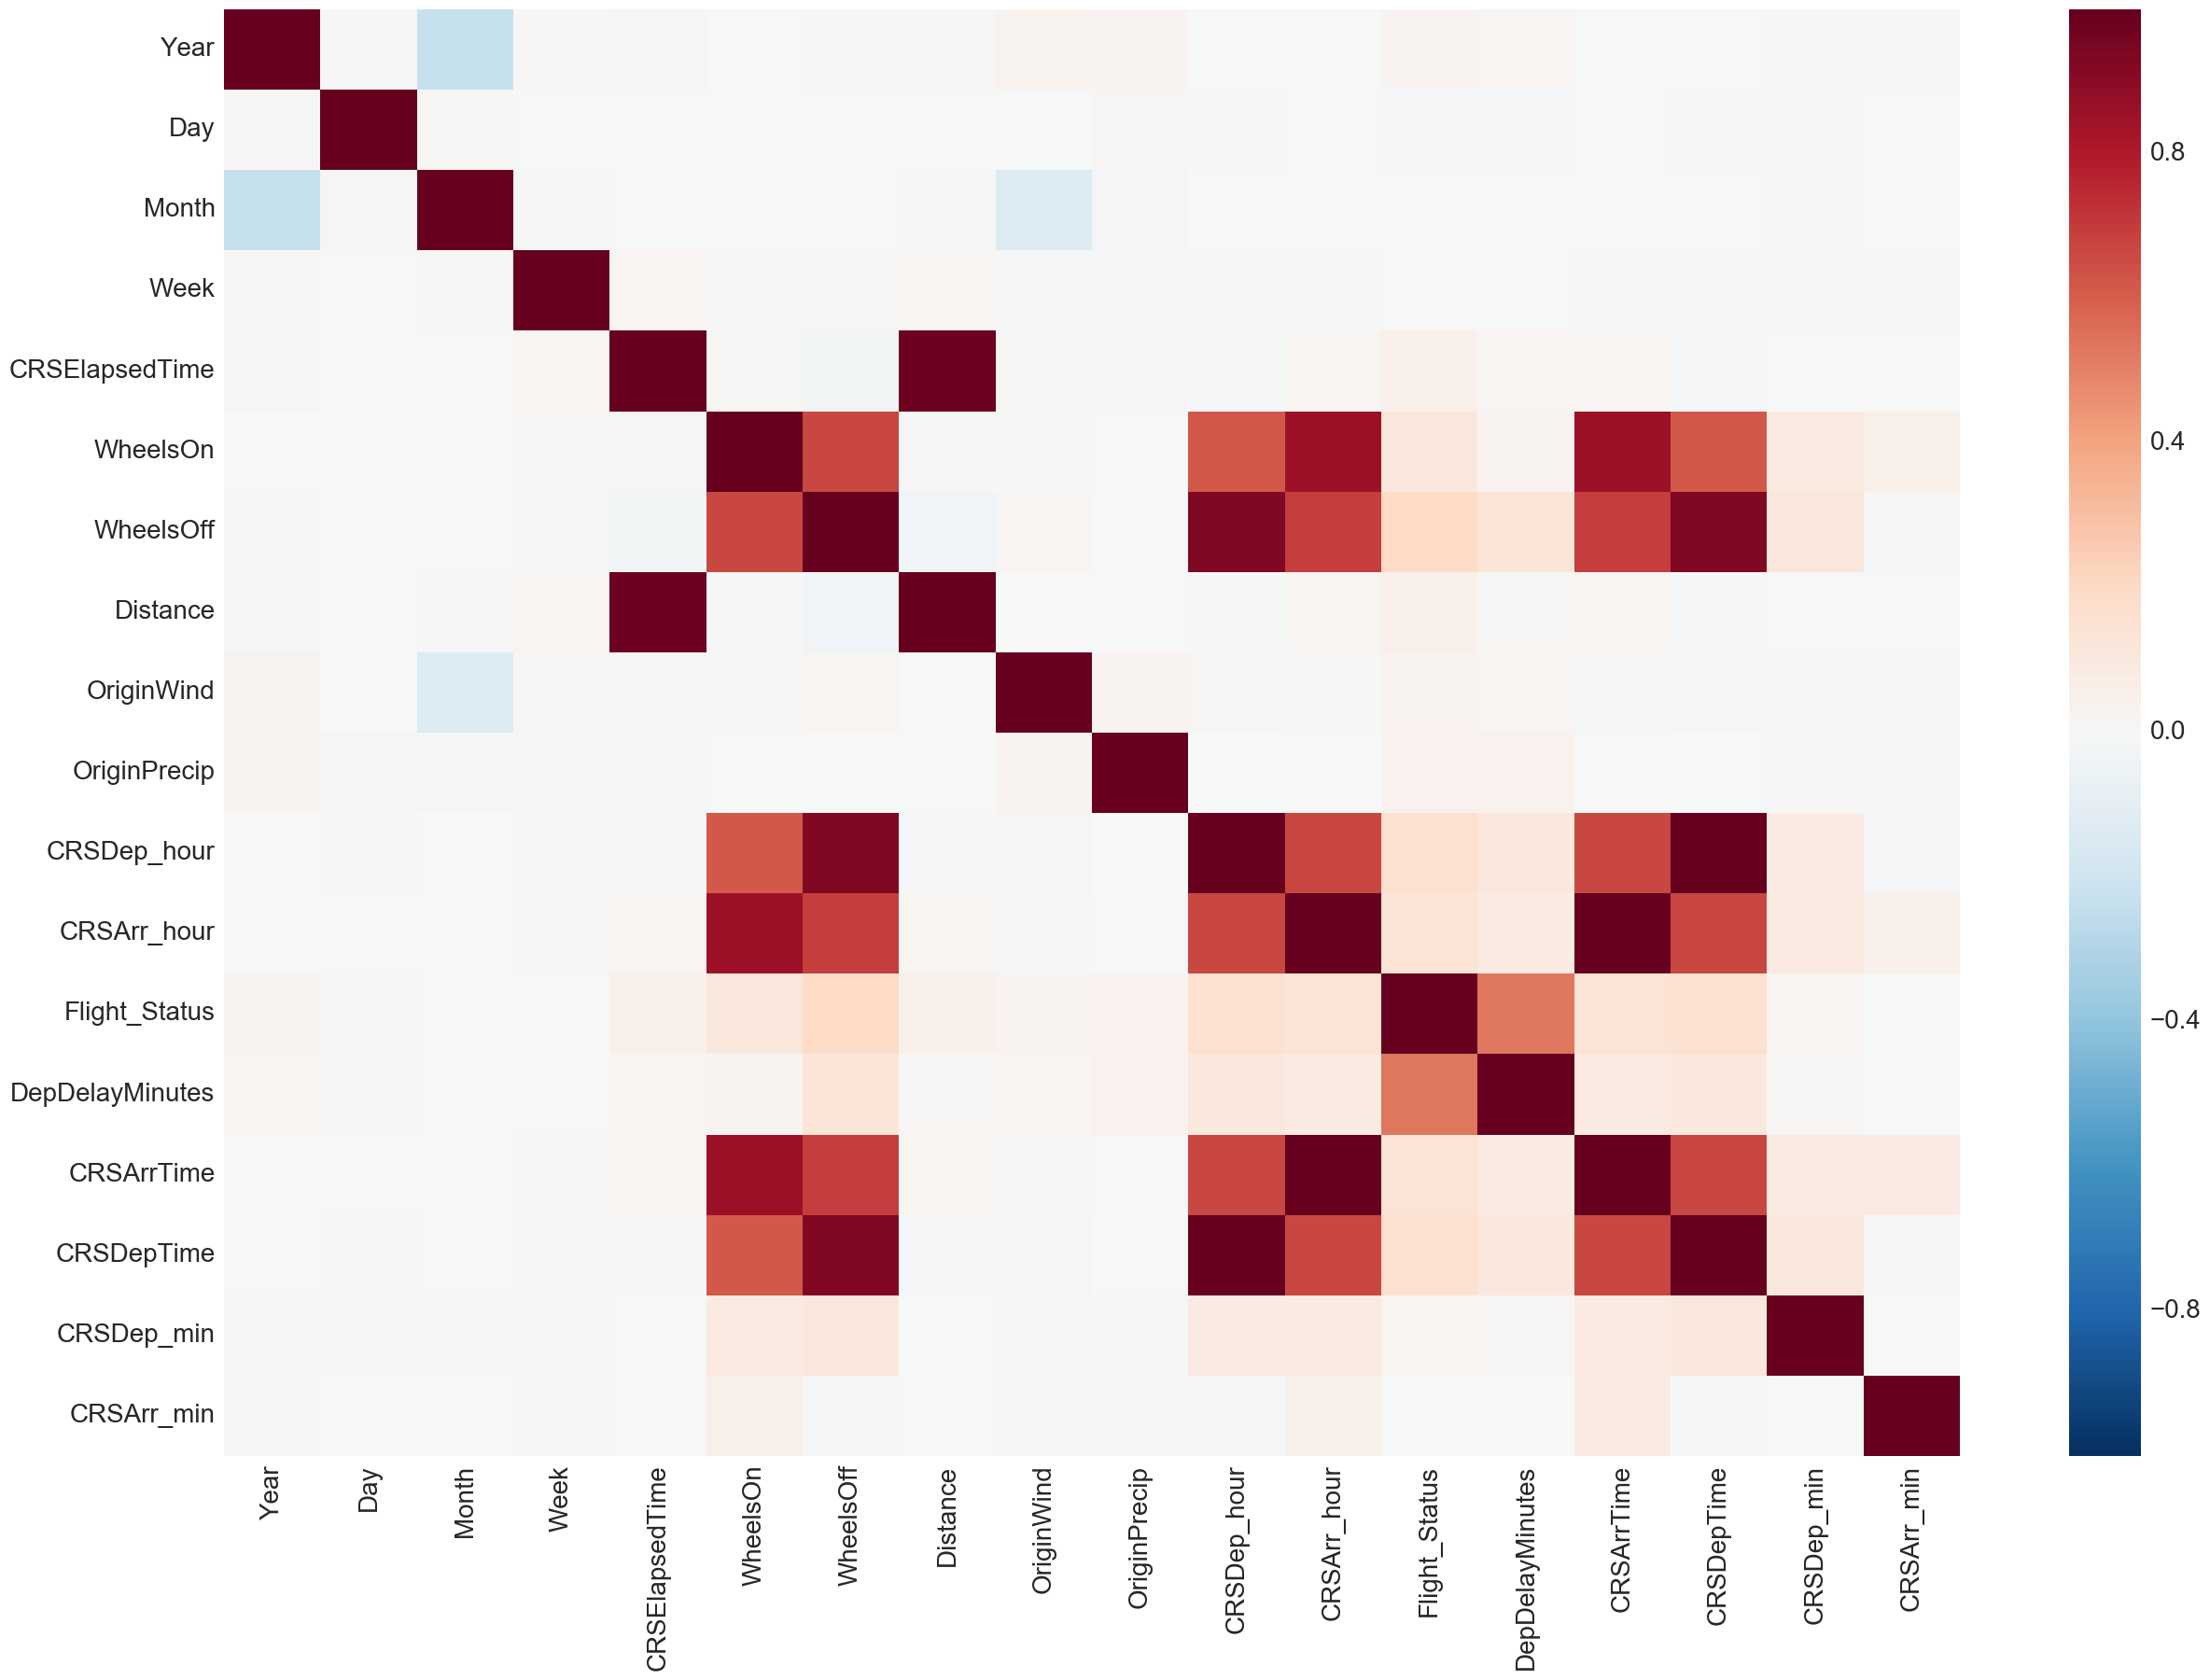

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
color = sns.color_palette()
plt.figure(figsize = (30,20))
sns.set(font_scale = 2)
sns.heatmap(data=df.corr())
plt.show()
plt.gcf().clear()

In [10]:
df.columns

Index(['Year', 'Day', 'Month', 'Week', 'Origin', 'Dest', 'UniqueCarrier',
       'CRSElapsedTime', 'WheelsOn', 'WheelsOff', 'Distance', 'OriginWind',
       'OriginPrecip', 'CRSDep_hour', 'CRSArr_hour', 'Flight_Status',
       'DepDelayMinutes', 'CRSArrTime', 'CRSDepTime', 'CRSDep_min',
       'CRSArr_min', 'Scheduled_Dep_T', 'Scheduled_Arr_T'],
      dtype='object')

In [21]:
colls = ['Year', 'Day', 'Month', 'Week', 'Origin','Dest', 'UniqueCarrier','CRSElapsedTime', 'OriginWind', 'OriginPrecip','CRSDep_hour','CRSArr_hour','Flight_Status','DepDelayMinutes','CRSArrTime','CRSDepTime']
len(colls)

colls.remove('Flight_Status')
colls.remove('CRSArrTime')
colls.remove('CRSDepTime')
len(colls)

13

In [22]:
X = df[colls]
y = df['Flight_Status']

In [23]:
X.columns

Index(['Year', 'Day', 'Month', 'Week', 'Origin', 'Dest', 'UniqueCarrier',
       'CRSElapsedTime', 'OriginWind', 'OriginPrecip', 'CRSDep_hour',
       'CRSArr_hour', 'DepDelayMinutes'],
      dtype='object')

In [24]:
len(X.columns)

13

In [25]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

X['carrier'] = label_encoder.fit_transform(X['UniqueCarrier'])
X['origin'] = label_encoder.fit_transform(X['Origin'])
X['dest'] = label_encoder.fit_transform(X['Dest'])

X = X._get_numeric_data()

In [26]:
c=0
for i in X.columns.tolist():
    print(c,'',i)
    c=c+1

0  Year
1  Day
2  Month
3  Week
4  CRSElapsedTime
5  OriginWind
6  OriginPrecip
7  CRSDep_hour
8  CRSArr_hour
9  DepDelayMinutes
10  carrier
11  origin
12  dest


Feature ranking:
1. feature 1 (0.250092)
2. feature 2 (0.154778)
3. feature 0 (0.125871)
4. feature 7 (0.045717)
5. feature 10 (0.044092)
6. feature 13 (0.043659)
7. feature 6 (0.043440)
8. feature 5 (0.042660)
9. feature 3 (0.042191)
10. feature 9 (0.042055)
11. feature 8 (0.042045)
12. feature 11 (0.041782)
13. feature 4 (0.040920)
14. feature 12 (0.040699)


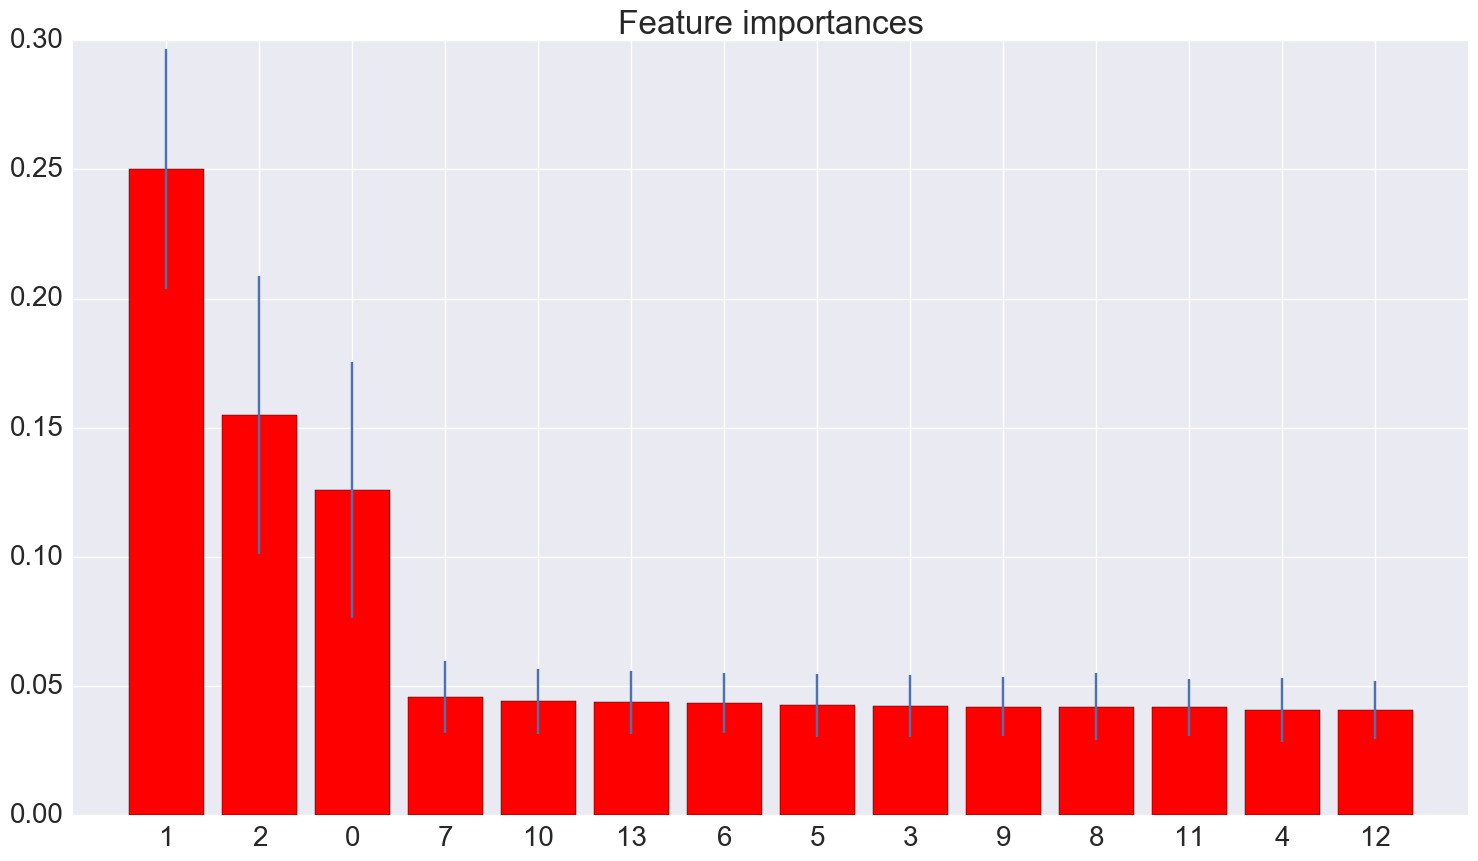

In [27]:
import matplotlib.pyplot as plt

from sklearn.datasets import make_classification
from sklearn.ensemble import ExtraTreesClassifier

# Build a classification task using 3 informative features
X, y = make_classification(n_samples=1000,
                           n_features=14,
                           n_informative=3,
                           n_redundant=0,
                           n_repeated=0,
                           n_classes=2,
                           random_state=0,
                           shuffle=False)

# Build a forest and compute the feature importances
forest = ExtraTreesClassifier(n_estimators=250,
                              random_state=0)

forest.fit(X, y)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f],importances[indices[f]]))

# Plot the feature importances of the forest

plt.figure(figsize=(18, 10))
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

# CLASSIFICATION

In [30]:
colls = ['Year', 'Day', 'Month', 'Week', 'Origin','Dest', 'UniqueCarrier','CRSElapsedTime', 
         'OriginWind', 'OriginPrecip','CRSDep_hour','CRSArr_hour','Flight_Status',
         'DepDelayMinutes','CRSArrTime','CRSDepTime']
len(colls)

colls.remove('Flight_Status')
colls.remove('CRSArrTime')
colls.remove('CRSDepTime')
len(colls)

13

In [31]:
X= df[colls]
y = df['Flight_Status']

In [32]:
X.isnull().sum()

Year               0
Day                0
Month              0
Week               0
Origin             0
Dest               0
UniqueCarrier      0
CRSElapsedTime     0
OriginWind         0
OriginPrecip       0
CRSDep_hour        0
CRSArr_hour        0
DepDelayMinutes    0
dtype: int64

In [33]:
from sklearn import preprocessing, cross_validation

y = np.ravel(y)
# Splitting the data
X_train, X_test, y_train, y_test =  cross_validation.train_test_split(X, y,test_size=0.30,random_state=0)

/Users/sonalichaudhari/anaconda/lib/python3.5/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [34]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
# Converting the categorical data to numeric 

X_train['carrier'] = label_encoder.fit_transform(X_train['UniqueCarrier'])
X_train['origin'] = label_encoder.fit_transform(X_train['Origin'])
X_train['dest'] = label_encoder.fit_transform(X_train['Dest'])
# X_train['ori_city'] = label_encoder.fit_transform(X_train['OriginCityName'])
# X_train['dest_city'] = label_encoder.fit_transform(X_train['DestCityName'])

X_test['carrier'] = label_encoder.fit_transform(X_test['UniqueCarrier'])
X_test['origin'] = label_encoder.fit_transform(X_test['Origin'])
X_test['dest'] = label_encoder.fit_transform(X_test['Dest'])
# X_test['ori_city'] = label_encoder.fit_transform(X_test['OriginCityName'])
# X_test['dest_city'] = label_encoder.fit_transform(X_test['DestCityName'])

# Getting only the numerical columns

X_train = X_train._get_numeric_data()
X_test = X_test._get_numeric_data()

# NEURAL

In [35]:
from sklearn.neural_network import MLPClassifier

nn3 = MLPClassifier(hidden_layer_sizes=(10,5,2),max_iter=30,verbose=False)
nn3= nn3.fit(X_train, y_train)

accuracy = nn3.score(X_train, y_train)
print('Accuracy: ',accuracy)

# Run the model on the test set
y_pred = nn3.predict(X_test)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

Accuracy:  0.958794818648
[[1878971    1038]
 [  98443  439053]]


In [222]:
from sklearn.neural_network import MLPClassifier

nn4 = MLPClassifier(hidden_layer_sizes=(10,5,2),max_iter=5,verbose=False)
nn4= nn4.fit(X_train, y_train)

accuracy = nn4.score(X_train, y_train)
print('Accuracy: ',accuracy)

# Run the model on the test set
y_pred = nn4.predict(X_test)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

Accuracy:  0.959077932309
[[1879355     654]
 [  98162  439334]]


In [223]:
from sklearn.neural_network import MLPClassifier

nn5 = MLPClassifier(hidden_layer_sizes=(15,10,5),max_iter=20,verbose=False, learning_rate='adaptive')
nn5= nn5.fit(X_train, y_train)

accuracy = nn5.score(X_train, y_train)
print('Accuracy: ',accuracy)

# Run the model on the test set
y_pred = nn5.predict(X_test)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

print(cm)

Accuracy:  0.965447369223
[[1877361    2648]
 [  80803  456693]]


In [224]:
from sklearn.neural_network import MLPClassifier

nn6 = MLPClassifier(hidden_layer_sizes=(30,15,5),max_iter=20,verbose=False, learning_rate='adaptive')
nn6= nn6.fit(X_train, y_train)

accuracy = nn6.score(X_train, y_train)
print('Accuracy: ',accuracy)

# Run the model on the test set
y_pred = nn6.predict(X_test)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

print(cm)

Accuracy:  0.965732787505
[[1876129    3880]
 [  78771  458725]]


In [225]:
## CIty Dest origin

In [226]:
from sklearn.neural_network import MLPClassifier

nn7 = MLPClassifier(hidden_layer_sizes=(15,10,5),max_iter=5,verbose=False, learning_rate='adaptive')
nn7= nn7.fit(X_train, y_train)

accuracy = nn7.score(X_train, y_train)
print('Accuracy: ',accuracy)

# Run the model on the test set
y_pred = nn7.predict(X_test)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

print(cm)

Accuracy:  0.965156632589
[[1874847    5162]
 [  78986  458510]]


In [227]:
# With reomved dest city origin city elapsed actual

In [228]:
from sklearn.neural_network import MLPClassifier

nn8 = MLPClassifier(hidden_layer_sizes=(15,10,5),max_iter=5,verbose=False, learning_rate='adaptive')
nn8= nn8.fit(X_train, y_train)

accuracy = nn8.score(X_train, y_train)
print('Accuracy: ',accuracy)

# Run the model on the test set
y_pred = nn8.predict(X_test)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)


import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve

preds = rtf1.predict_proba(X_test)[:,1]
fpr, tpr, _ = roc_curve(y_test, preds)
plt.figure()
plt.plot(fpr, tpr, label='ROC curve')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1-Specificity')
plt.ylabel('Sensitivity')
plt.title('ROC curve')
plt.legend(loc="lower right")
plt.show()

Accuracy:  0.958373073249
[[1875286    4723]
 [  95852  441644]]


ValueError: Number of features of the model must match the input. Model n_features is 14 and input n_features is 16 

In [ ]:
### with accELapsed time:

In [229]:
from sklearn.neural_network import MLPClassifier

nn = MLPClassifier(hidden_layer_sizes=(15,10,5),max_iter=20,verbose=False)
nn= nn.fit(X_train, y_train)

accuracy = nn.score(X_train, y_train)
print('Accuracy: ',accuracy)

# Run the model on the test set
y_pred = nn.predict(X_test)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

Accuracy:  0.941101721657
[[1820316   59693]
 [  82148  455348]]


In [230]:
from sklearn.neural_network import MLPClassifier

nn1 = MLPClassifier(hidden_layer_sizes=(15,10,5),max_iter=5,verbose=False)
nn1= nn1.fit(X_train, y_train)

accuracy = nn1.score(X_train, y_train)
print('Accuracy: ',accuracy)

# Run the model on the test set
y_pred = nn1.predict(X_test)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

Accuracy:  0.955706628299
[[1866546   13463]
 [  93335  444161]]


In [231]:
from sklearn.neural_network import MLPClassifier

nn2 = MLPClassifier(hidden_layer_sizes=(10,5,2),max_iter=30,verbose=False)
nn2= nn2.fit(X_train, y_train)

accuracy = nn2.score(X_train, y_train)
print('Accuracy: ',accuracy)

# Run the model on the test set
y_pred = nn2.predict(X_test)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

Accuracy:  0.959106828694
[[1878908    1101]
 [  97640  439856]]


In [232]:
#
s = ['Year', 'Day', 'Month', 'Week', 'Origin','Dest', 'UniqueCarrier','CRSElapsedTime', 'WheelsOn', 'WheelsOff', 'OriginWind', 'OriginPrecip','CRSDep_hour','CRSArr_hour']

X= df[s]
y = df['Flight_Status']

from sklearn import preprocessing, cross_validation

y = np.ravel(y)
# Splitting the data
X_train, X_test, y_train, y_test =  cross_validation.train_test_split(X, y,test_size=0.30,random_state=0)

from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
# Converting the categorical data to numeric 

X_train['carrier'] = label_encoder.fit_transform(X_train['UniqueCarrier'])
X_train['origin'] = label_encoder.fit_transform(X_train['Origin'])
X_train['dest'] = label_encoder.fit_transform(X_train['Dest'])
# X_train['ori_city'] = label_encoder.fit_transform(X_train['OriginCityName'])
# X_train['dest_city'] = label_encoder.fit_transform(X_train['DestCityName'])

X_test['carrier'] = label_encoder.fit_transform(X_test['UniqueCarrier'])
X_test['origin'] = label_encoder.fit_transform(X_test['Origin'])
X_test['dest'] = label_encoder.fit_transform(X_test['Dest'])
# X_test['ori_city'] = label_encoder.fit_transform(X_test['OriginCityName'])
# X_test['dest_city'] = label_encoder.fit_transform(X_test['DestCityName'])

# Getting only the numerical columns

X_train = X_train._get_numeric_data()
X_test = X_test._get_numeric_data()

In [ ]:
from sklearn.neural_network import MLPClassifier

nn9 = MLPClassifier(hidden_layer_sizes=(10,5,2),max_iter=30,verbose=False)
nn9= nn9.fit(X_train, y_train)

accuracy = nn9.score(X_train, y_train)
print('Accuracy: ',accuracy)

# Run the model on the test set
y_pred = nn9.predict(X_test)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

In [ ]:
# Run the model on the test set
y_pred = nn9.predict(X_test)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve

preds = nn9.predict_proba(X_test)[:,1]
fpr, tpr, _ = roc_curve(y_test, preds)
plt.figure()
plt.plot(fpr, tpr, label='ROC curve')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1-Specificity')
plt.ylabel('Sensitivity')
plt.title('ROC curve')
plt.legend(loc="lower right")
plt.show()

In [ ]:
from sklearn.neural_network import MLPClassifier

nn10 = MLPClassifier(hidden_layer_sizes=(100,70,50,25,10,5),max_iter=30,verbose=False)
nn10= nn10.fit(X_train, y_train)

accuracy = nn10.score(X_train, y_train)
print('Accuracy: ',accuracy)

# Run the model on the test set
y_pred = nn10.predict(X_test)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve

preds = nn10.predict_proba(X_test)[:,1]

fpr, tpr, _ = roc_curve(y_test, preds)
plt.figure()
plt.plot(fpr, tpr, label='ROC curve')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1-Specificity')
plt.ylabel('Sensitivity')
plt.title('ROC curve')
plt.legend(loc="lower right")
plt.show()

# RANDOM FOREST

In [37]:
# Creating the model
from sklearn.ensemble import RandomForestClassifier

model1 = RandomForestClassifier(max_depth =5,random_state=0)
model1 = model1.fit(X_train, y_train)

accuracy = model1.score(X_train, y_train)
print('Accuracy: ',accuracy)

# Run the model on the test set
y_pred = model1.predict(X_test)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

Accuracy:  0.958826728766
[[1880009       0]
 [  99481  438015]]


In [38]:
# Creating the model
from sklearn.ensemble import RandomForestClassifier

rtf = RandomForestClassifier(max_depth =25,random_state=0)
rtf = rtf.fit(X_train, y_train)

accuracy = rtf.score(X_train, y_train)
print('Accuracy: ',accuracy)

# Run the model on the test set
y_pred = rtf.predict(X_test)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

Accuracy:  0.974602559475
[[1876442    3567]
 [  96491  441005]]


Accuracy:  0.974602559475
[[1875728    4281]
 [  96164  441332]]


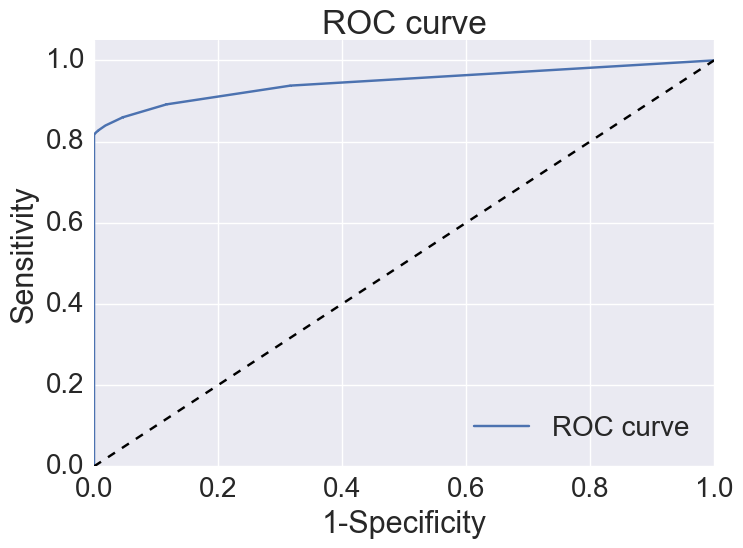

In [39]:
# Creating the model
from sklearn.ensemble import RandomForestClassifier

rtf1 = RandomForestClassifier(max_depth =50,random_state=0)
rtf1 = rtf1.fit(X_train, y_train)

accuracy = rtf1.score(X_train, y_train)
print('Accuracy: ',accuracy)

# Run the model on the test set
y_pred = rtf1.predict(X_test)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve

preds = rtf1.predict_proba(X_test)[:,1]
fpr, tpr, _ = roc_curve(y_test, preds)
plt.figure()
plt.plot(fpr, tpr, label='ROC curve')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1-Specificity')
plt.ylabel('Sensitivity')
plt.title('ROC curve')
plt.legend(loc="lower right")
plt.show()

Accuracy:  0.992605893728
[[1875728    4281]
 [  96164  441332]]


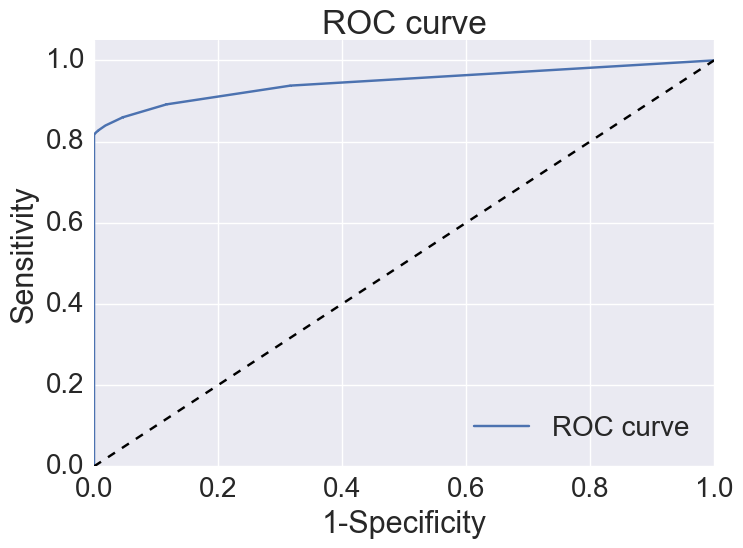

In [36]:
# Creating the model
from sklearn.ensemble import RandomForestClassifier

rtf1 = RandomForestClassifier(max_depth =50,random_state=0)
rtf1 = rtf1.fit(X_train, y_train)

accuracy = rtf1.score(X_train, y_train)
print('Accuracy: ',accuracy)

# Run the model on the test set
y_pred = rtf1.predict(X_test)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve

preds = rtf1.predict_proba(X_test)[:,1]
fpr, tpr, _ = roc_curve(y_test, preds)
plt.figure()
plt.plot(fpr, tpr, label='ROC curve')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1-Specificity')
plt.ylabel('Sensitivity')
plt.title('ROC curve')
plt.legend(loc="lower right")
plt.show()

Accuracy:  0.95902687612
[[1880009       0]
 [  98940  438556]]


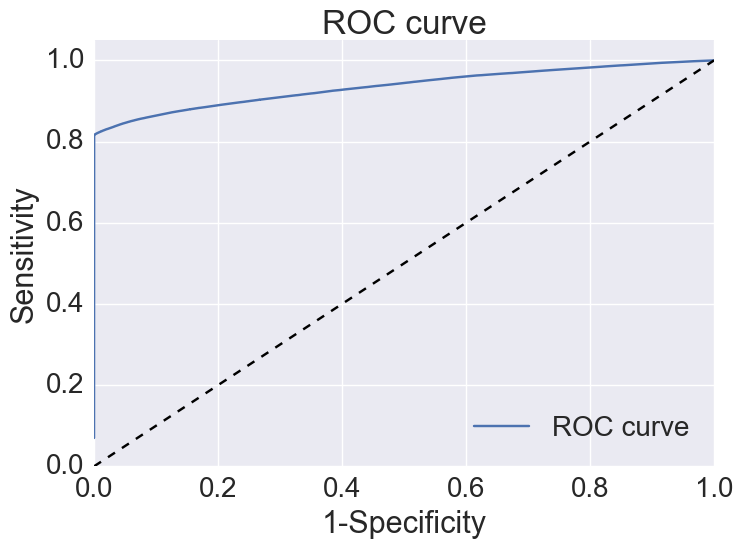

In [40]:
# Creating the model
from sklearn.ensemble import RandomForestClassifier

rt = RandomForestClassifier(max_depth =7,random_state=0)
model1 = rt.fit(X_train, y_train)

accuracy = rt.score(X_train, y_train)
print('Accuracy: ',accuracy)

#Run the model on the test set
y_pred = rt.predict(X_test)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve

preds = rt.predict_proba(X_test)[:,1]
fpr, tpr, _ = roc_curve(y_test, preds)
plt.figure()
plt.plot(fpr, tpr, label='ROC curve')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1-Specificity')
plt.ylabel('Sensitivity')
plt.title('ROC curve')
plt.legend(loc="lower right")
plt.show()

In [48]:
s1 = df[df.Flight_Status==1][:1787690]

In [49]:
s1.shape

(1787690, 19)

In [50]:
s2 =df[df.Flight_Status==0][:1787690]
s2.shape

(1787690, 19)

In [51]:
f = pd.concat([s1,s2])

In [52]:
f.shape

(3575380, 19)

In [53]:
f.to_csv(cur_path+'/reduced.csv',index=False)